## Bowler points clustering

In [ ]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from time import time 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
import itertools
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


1. Read data from CSV
    

In [ ]:
# Cleaned data of match-wise player performances
cust_df = pd.read_csv("bowler_all3.csv")  
cust_df.head(20)
cust_df.shape

(5329, 25)

2. Get the features required for clustering

In [ ]:
# Importance performance measures of bowlers as features
df = cust_df[['economy','overs','wickets']]
df

,economy,overs,wickets
0,9.500000,4,0
1,2.333333,3,1
2,6.250000,4,3
3,3.000000,3,2
4,9.500000,4,1
...,...,...,...
5324,8.250000,4,2
5325,10.666667,3,2
5326,4.750000,4,3
5327,7.666667,3,0


3. Normalization of data

In [ ]:
# Sklearn library import
from sklearn.preprocessing import StandardScaler

# Taking all the features
X = df.values[:,0:]
X = np.nan_to_num(X)

# Transformation of features
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.49923896,  0.59740658, -1.02513566],
       [-2.02162019, -0.65350881, -0.08969937],
       [-0.64394136,  0.59740658,  1.78117321],
       ...,
       [-1.17156304,  0.59740658,  1.78117321],
       [-0.14563199, -0.65350881, -1.02513566],
       [-0.38013051,  0.59740658, -0.08969937]])

4. Creating Clustering model

In [ ]:
# Number of clusters
clusterNum = 5

# Model built for Kmeans clustering
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 15)

# Data fitting
k_means.fit(X)

# Labels derivation
labels = k_means.labels_
print(labels)

[4 0 2 ... 0 2 2]


5. Mapping obtained clusters to corrosponding points

In [ ]:
points=[]
for i in labels:
  if(i==0):
    points.append(9)
  elif(i==1):
    points.append(8.5)
  elif(i==2):
    points.append(10)
  elif(i==3):
    points.append(9.5)
  elif(i==4):
    points.append(8)

print(points)            

[8, 9, 10, 9, 8, 9.5, 9.5, 8, 9.5, 9.5, 8, 8, 8, 9.5, 9.5, 9.5, 9, 9, 9, 9, 10, 9, 8, 9, 10, 9, 9.5, 9.5, 10, 8, 9, 8, 8, 9.5, 10, 9, 9.5, 9.5, 8, 10, 8, 10, 10, 9, 8, 8.5, 10, 8.5, 9, 8, 8, 8, 8.5, 9.5, 8, 9.5, 10, 9.5, 9.5, 9.5, 9.5, 8, 9.5, 8, 8, 9, 10, 8, 8, 10, 8, 10, 9, 8, 9.5, 8.5, 10, 8, 9, 10, 10, 10, 10, 9, 9.5, 9.5, 8, 10, 10, 8, 10, 10, 8, 9.5, 8, 8, 10, 9.5, 8, 8, 10, 8, 9, 8, 9.5, 10, 8, 10, 10, 9.5, 9.5, 9.5, 10, 9.5, 10, 10, 10, 10, 8, 8, 9.5, 8, 9.5, 8, 8, 8, 8, 8, 9, 8, 10, 8, 10, 8, 8, 10, 10, 8, 9.5, 9.5, 8, 9.5, 10, 10, 9, 10, 10, 8, 9, 9, 9, 8, 10, 8, 9, 10, 9.5, 9, 10, 9, 9, 8, 9, 8, 10, 8, 9, 8, 9, 10, 10, 10, 9, 10, 10, 9, 10, 8, 8, 8, 10, 10, 10, 9.5, 8, 10, 10, 9, 9.5, 10, 10, 9.5, 8, 9.5, 9.5, 9.5, 10, 9, 9, 8, 10, 9.5, 8, 8, 9, 10, 8, 8, 8.5, 9.5, 9.5, 8, 9.5, 10, 9.5, 9.5, 10, 10, 8, 9, 8, 10, 8, 9, 10, 8, 10, 8.5, 10, 10, 9, 10, 10, 9, 9.5, 9.5, 8, 8, 9, 8, 9, 9.5, 10, 9.5, 9.5, 8.5, 10, 10, 8, 9.5, 9, 9.5, 8.5, 9, 8, 9, 10, 8.5, 9.5, 9.5, 9.5, 9.5, 8, 8,

6. Adding clustered points to Dataset

In [ ]:
# Dataset with cluster points
df_new = cust_df
df_new["Points"] = labels
df_new.head(25)

,match_id,bowler,inning,batting_team,total_bowler_runs,maiden,economy,overs,wickets,venue,catch,Direct_runout,Indirect_runout,Stumping,lbw/bowled,fp_points,fp_avg,opp_avg,ven_avg,inn_avg,run_avg,eco_avg,maiden_avg,wicket_avg,over_avg,Points
0,1,P Kumar,1,Kolkata Knight Riders,38.0,0.0,9.500000,4,0,M Chinnaswamy Stadium,1.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,8.0,8.0,38.0,9.500000,0.0,0.0,4.0,4
1,1,I Sharma,2,Royal Challengers Bangalore,7.0,0.0,2.333333,3,1,M Chinnaswamy Stadium,0.0,0.0,0.0,0.0,1.0,39.0,0.0,39.0,39.0,39.0,7.0,2.333333,0.0,1.0,3.0,0
2,1,AB Agarkar,2,Royal Challengers Bangalore,25.0,0.0,6.250000,4,3,M Chinnaswamy Stadium,0.0,0.0,1.0,0.0,0.0,87.0,0.0,87.0,87.0,87.0,25.0,6.250000,0.0,3.0,4.0,2
3,1,AB Dinda,2,Royal Challengers Bangalore,9.0,0.0,3.000000,3,2,M Chinnaswamy Stadium,0.0,0.0,0.0,0.0,1.0,64.0,0.0,64.0,64.0,64.0,9.0,3.000000,0.0,2.0,3.0,0
4,1,Z Khan,1,Kolkata Knight Riders,38.0,0.0,9.500000,4,1,M Chinnaswamy Stadium,0.0,0.0,0.0,0.0,0.0,25.0,0.0,25.0,25.0,25.0,38.0,9.500000,0.0,1.0,4.0,4
5,2,S Sreesanth,1,Chennai Super Kings,35.0,0.0,11.666667,3,0,"Punjab Cricket Association Stadium, Mohali",0.0,0.0,0.0,0.0,0.0,-4.0,0.0,-4.0,-4.0,-4.0,35.0,11.666667,0.0,0.0,3.0,3
6,2,WA Mota,1,Chennai Super Kings,24.0,0.0,12.000000,2,1,"Punjab Cricket Association Stadium, Mohali",0.0,0.0,0.0,0.0,0.0,21.0,0.0,21.0,21.0,21.0,24.0,12.000000,0.0,1.0,2.0,3
7,2,M Muralitharan,2,Kings XI Punjab,33.0,0.0,8.250000,4,1,"Punjab Cricket Association Stadium, Mohali",0.0,0.0,0.0,0.0,0.0,25.0,0.0,25.0,25.0,25.0,33.0,8.250000,0.0,1.0,4.0,4
8,2,P Amarnath,2,Kings XI Punjab,42.0,0.0,10.500000,4,1,"Punjab Cricket Association Stadium, Mohali",1.0,0.0,0.0,0.0,0.0,31.0,0.0,31.0,31.0,31.0,42.0,10.500000,0.0,1.0,4.0,3
9,2,MS Gony,2,Kings XI Punjab,42.0,0.0,10.500000,4,1,"Punjab Cricket Association Stadium, Mohali",0.0,0.0,0.0,0.0,0.0,23.0,0.0,23.0,23.0,23.0,42.0,10.500000,0.0,1.0,4.0,3


7. Statistics to determine points value

In [ ]:
df_new.groupby("Points").mean()

,match_id,inning,total_bowler_runs,maiden,economy,overs,wickets,catch,Direct_runout,Indirect_runout,Stumping,lbw/bowled,fp_points,fp_avg,opp_avg,ven_avg,inn_avg,run_avg,eco_avg,maiden_avg,wicket_avg,over_avg
Points,,,,,,,,,,,,,,,,,,,,,,
0,364.122807,1.522188,16.797730,0.146543,4.474286,3.716202,1.951496,0.219814,0.028896,0.026832,0.0,0.551084,64.230134,33.471276,48.628910,51.301775,41.257892,25.449798,7.237604,0.060541,1.260194,3.577423
1,448.246094,1.507812,36.484375,0.000000,15.207031,2.449219,0.332031,0.179688,0.015625,0.027344,0.0,0.066406,6.167969,30.108073,19.192101,17.822256,27.786834,28.155296,9.099097,0.031269,0.982061,3.282780
2,383.039216,1.521569,23.989542,0.039216,6.567375,3.645752,1.034641,0.179085,0.011765,0.024183,0.0,0.237255,32.179739,32.839325,33.655949,33.716440,34.434345,26.373470,7.574023,0.044677,1.118580,3.545241
3,413.888778,1.490982,35.302605,0.007014,11.082832,3.176353,0.550100,0.188377,0.014028,0.019038,0.0,0.099198,13.602204,31.793921,24.185781,23.116604,29.743408,28.175778,8.406386,0.032689,1.047646,3.434877
4,415.898477,1.480964,32.053934,0.013959,8.708545,3.677030,1.098985,0.180838,0.020305,0.037437,0.0,0.234137,31.784264,32.805097,33.510173,34.255376,35.248708,27.947579,7.935069,0.039973,1.153432,3.574877


8. Plotting clusters in 3-D plane

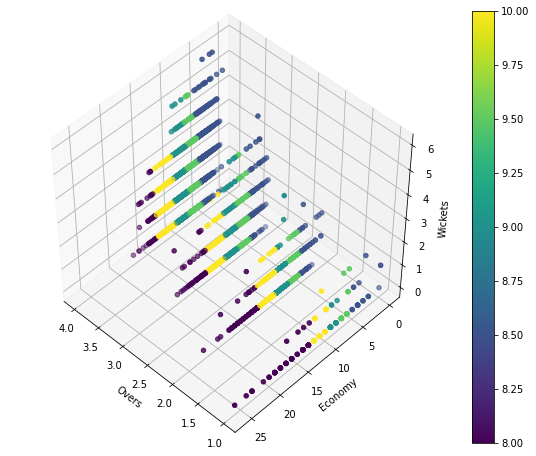

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

# Figure size initialization
fig = plt.figure(1, figsize=(8, 6))
plt.clf()

# Axes object
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# Labels for each axis
ax.set_xlabel('Overs')
ax.set_ylabel('Economy')
ax.set_zlabel('Wickets')

# Scatter plot for each points
pnt3d=ax.scatter(X[:, 1], X[:, 0], X[:, 2], c= points)

# Color bar plot
cbar=plt.colorbar(pnt3d)


9. Creating Dictionary with label to points mapping

In [ ]:
bowl_dict = dict(zip(labels,points))
bowl_dict

{0: 9, 1: 8.5, 2: 10, 3: 9.5, 4: 8}

In [ ]:
fp = open("bowl_dict.txt",'wt')
data = str(bowl_dict)
fp.write(data)

35

In [ ]:
df_new.to_csv('bowler_clusters.csv',index=False)